In [1]:
%matplotlib inline

# Importing homemade tools
from neural_net.net import *
from testing_data.load_mnist import *
import neural_net.necessities.prepping as prepping

# Other imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading data
train = load_mnist('testing_data/mnist_train.csv')
test = load_mnist('testing_data/mnist_test.csv')

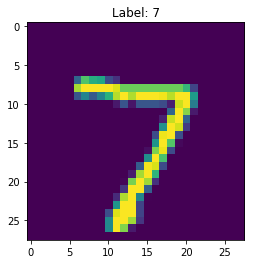

In [3]:
# Showing sample picture
plt.imshow(test[0][1])
plt.title('Label: ' + str(test[0][0]))
plt.show()

In [4]:
# Function to prep a single MNIST sample
def prepSingleMNIST(sample):
     # Prepping one-hot encoded label
    label = sample[0]
    hot_label = np.zeros(10)
    hot_label[int(label)] = 1
    hot_labels = [hot_label for n in range(28)]
    # Prepping pixels
    pixels = sample[1]
    new_pixels = np.divide(np.rot90(pixels, k=-1), 255)
    # Setting target of last half of empty inputs to zero.
    l = len(new_pixels)
    for i in range(l):
        if np.sum(new_pixels[i]) == 0:
            hot_labels[i] = np.zeros(10)
    # Returning
    return new_pixels, hot_labels

# Function to prep data (want to slide rnn across columns, not rows)
def prepMNIST_single(data):
    inputs, targets = [], []
    # Looping through data
    for sample in data:
        # Prepping data
        new_pixels, hot_labels = prepSingleMNIST(sample)
        # Appending to inputs and targets
        inputs.append(new_pixels)
        targets.append(hot_labels)
    return inputs, targets

In [5]:
# Prepping data
Ytrain, Xtrain = prepMNIST_single(train)
Ytest, Xtest = prepMNIST_single(test)

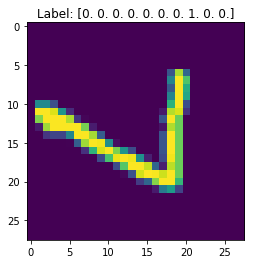

In [6]:
# Showing what data looks like now
plt.imshow(Ytest[0])
plt.title('Label: ' + str(Xtest[0][14]))
plt.show()

In [7]:
Xb = prepping.reBatchSeries(prepping.batchifySeries(Xtrain[:10000]), size=500)
Yb = prepping.reBatchSeries(prepping.batchifySeries(Ytrain[:10000]), size=500)

In [8]:
# Creating model
model = neural_net(10)
model.quicklayers(layertype='recurrent', neurons=[30,30], activation='tanh')
model.add(layertype='recurrent', neurons=28, activation='sigmoid') # Model ouput. Want log probability.

# Printing model info
model.disp()



Neural net structure
 #   Type         Size   Activation   Weights
 0 | base       |   10 |            | 
 1 | recurrent  |   30 | tanh       | 1230
 2 | recurrent  |   30 | tanh       | 1830
 3 | recurrent  |   28 | sigmoid    | 1652

Total amount of weights: 4712


In [9]:
# Training
model.batch_fit_sequence(Xb, Yb, epochs=1000, alpha=0.025, clip=0.1)

Training |██████████████████████████████████████████████████| 100.0% MSE = 0.00017151726414901236


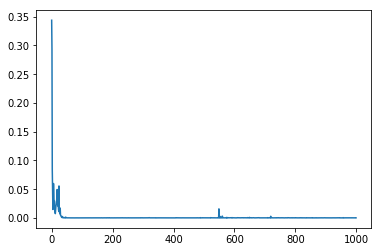

In [10]:
# Plotting MSE vs epoch
plt.plot(model.errlog)
plt.show()

In [11]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def slideModel(m, pic):
    m.reset()
    return [m.predict(col)[0] for col in pic]

def plotPreds(preds, label):
    fig = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(np.rot90(predictions))
    plt.title('Label: %s' % label)

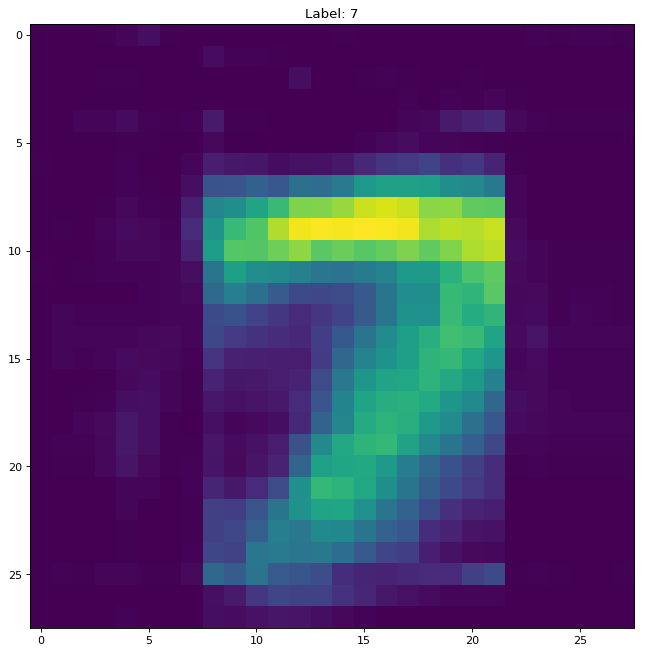

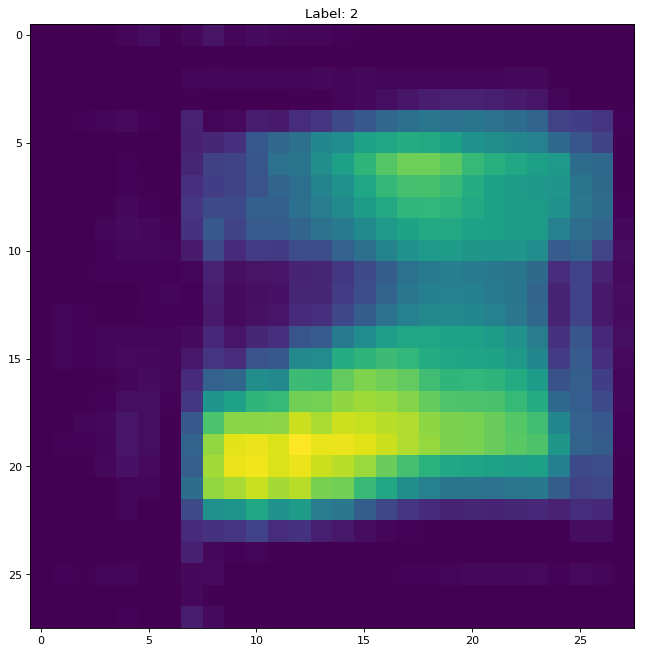

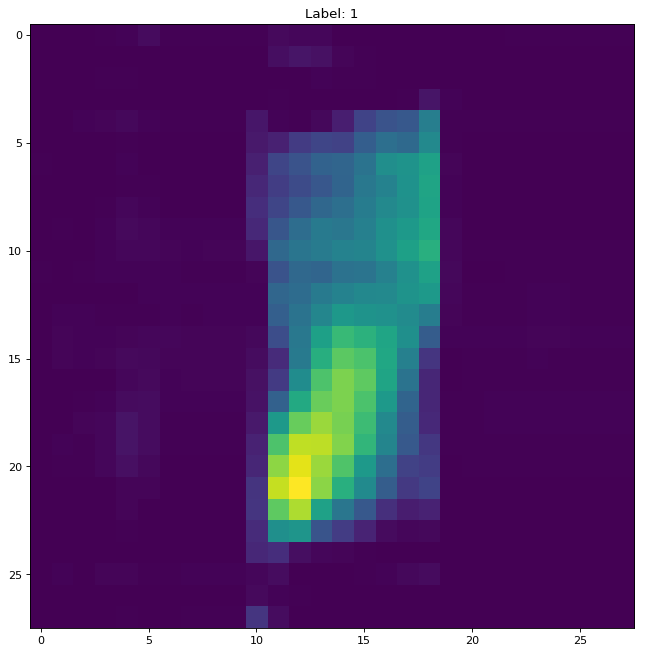

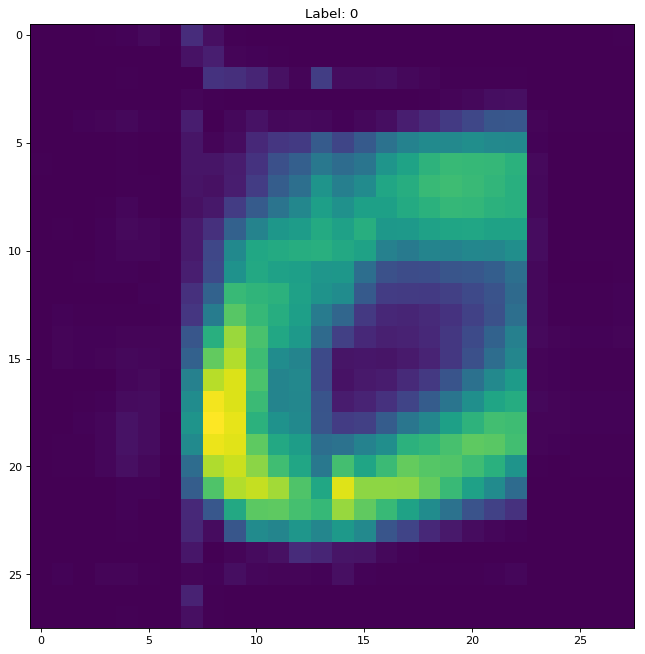

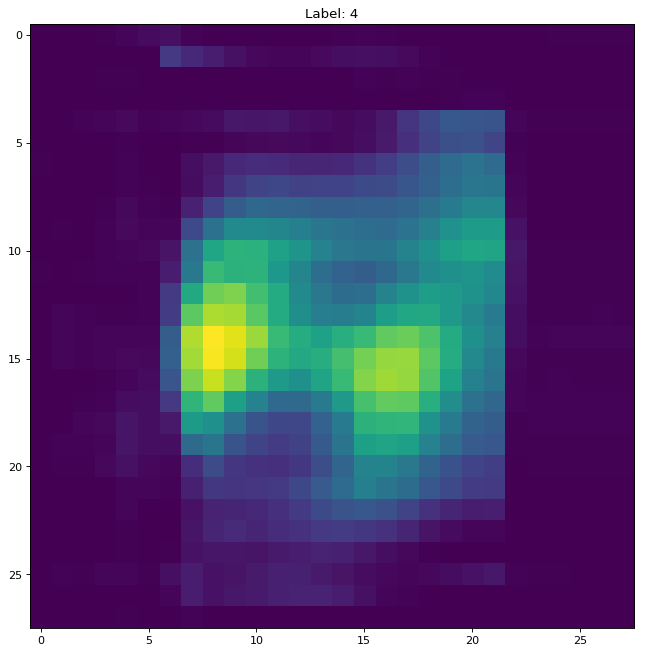

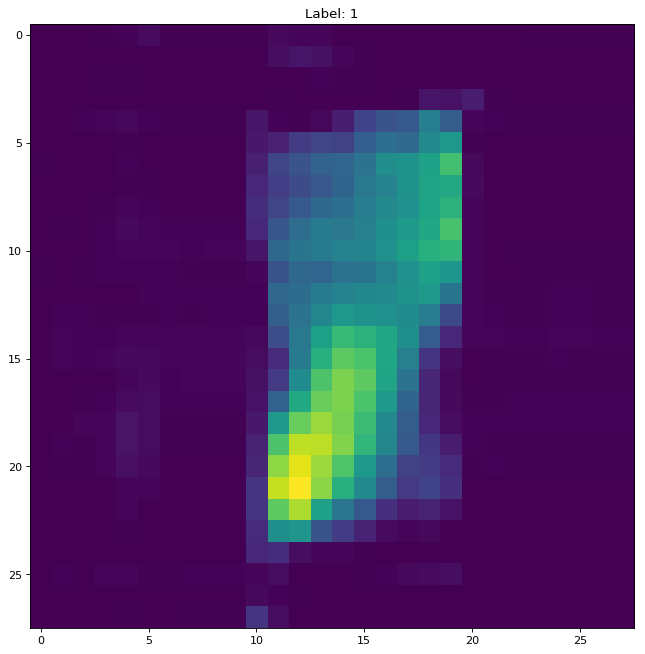

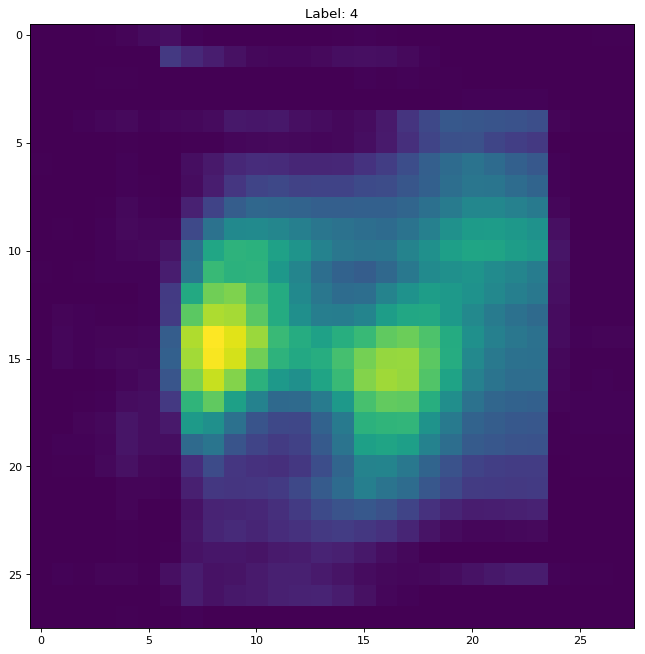

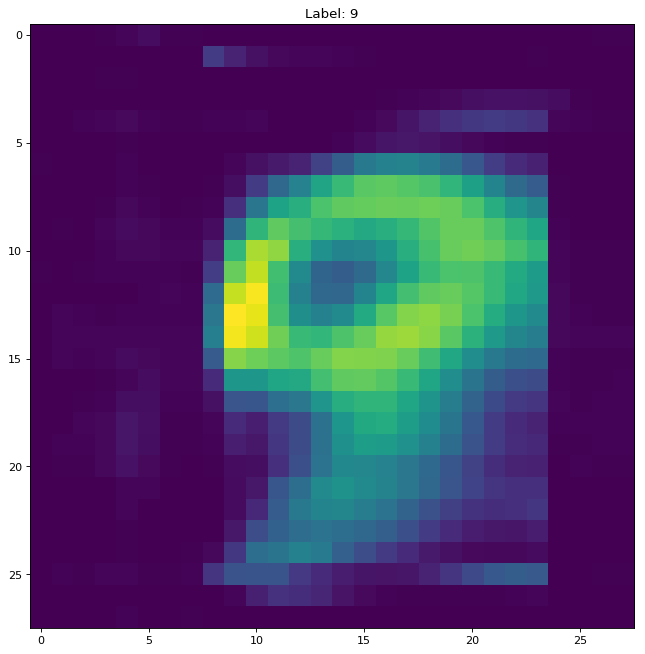

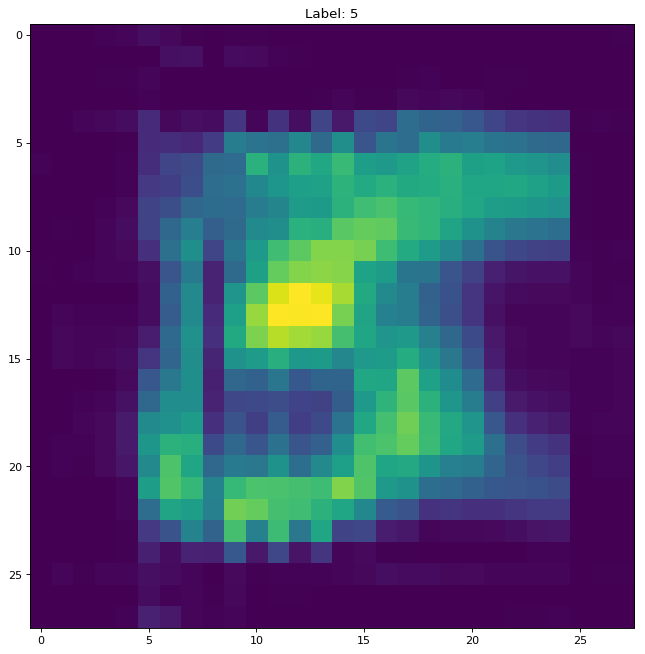

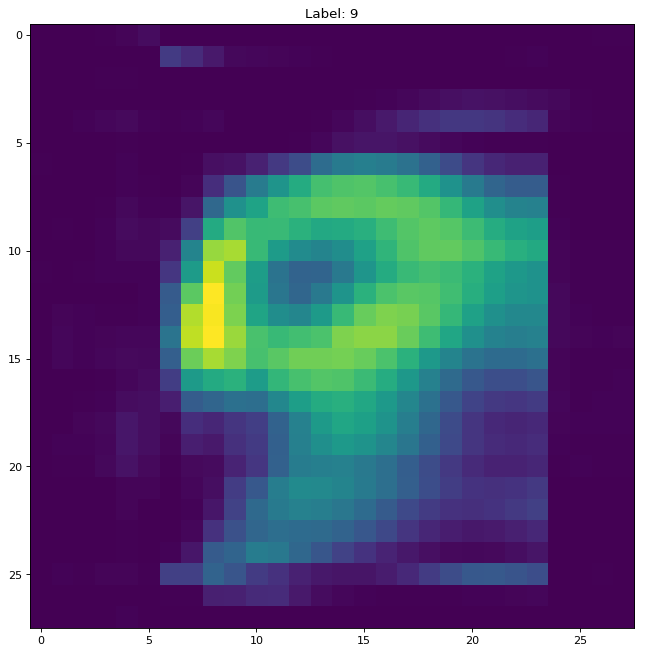

In [12]:
# Plotting prediction for some figure
for i in range(10):
    predictions = slideModel(model, Xtest[i])
    plotPreds(predictions, np.argmax(Xtest[i][15]))